# Basket Analysis with Association Rule

## Standard Apriori


### Import Importance Libraries

In [15]:
!pip install mlxtend


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Import necessary libraries for data manipulation
import pandas as pd

# Read product list into a pandas DataFrame for convenience
product_df = pd.read_csv(
    "productList.txt",
    sep=" ",
    header=None,
    names=["ProductID", "ProductName"],
    quotechar='"',
)
print("Total products:", product_df.shape[0])
product_df.head(5)  # display first 5 products for a quick look


Total products: 1560


,ProductID,ProductName
0,1,Washington Berry Juice
1,2,Washington Mango Drink
2,3,Washington Strawberry Drink
3,4,Washington Cream Soda
4,5,Washington Diet Soda


In [3]:
# Read sales transactions
with open("Sales1998.txt", "r") as f:
    sales_lines = f.readlines()

# Convert each transaction line into a list of integers (product IDs)
transactions = [list(map(int, line.strip().split())) for line in sales_lines]
print("Total transactions:", len(transactions))

# Create a product ID to name mapping for easy lookup
id_to_name = dict(zip(product_df.ProductID, product_df.ProductName))

# Display a few example transactions (both IDs and mapped names)
for i in range(3):
    trans_ids = transactions[i]
    trans_names = [id_to_name[pid] for pid in trans_ids]
    print(f"Transaction {i+1} (IDs): {trans_ids}")
    print(f"Transaction {i+1} (Names): {trans_names}\n")


Total transactions: 34070
Transaction 1 (IDs): [177, 1065]
Transaction 1 (Names): ['High Top Prepared Salad', 'Bird Call Dishwasher Detergent']

Transaction 2 (IDs): [477, 653, 154, 537]
Transaction 2 (Names): ['Dollar Monthly Sports Magazine', 'Bravo Canned Tuna in Oil', 'Denny Room Freshener', 'Fast Lemon Cookies']

Transaction 3 (IDs): [1141, 1241, 519]
Transaction 3 (Names): ['Tri-State Broccoli', 'Plato Apple Jelly', 'Tell Tale Cantelope']



In [4]:
# Convert transactions to one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_array, columns=te.columns_)


In [5]:
# Apply Apriori to extract frequent itemsets with min_support
min_support = 0.00001  
# frequent_itemsets = apriori(transaction_df, min_support=min_support, use_colnames=True)
frequent_itemsets = apriori(
    transaction_df,
    min_support=0.00001,
    use_colnames=True,
    max_len=2,
    low_memory=True,  # use this for large datasets
)
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))


In [6]:
print(
    f"Found {len(frequent_itemsets)} frequent itemsets with support >= {min_support:.4f}."
)
# Show the number of itemsets by size (e.g., 1-item, 2-item sets, etc.)
print(frequent_itemsets["length"].value_counts().sort_index())

# Preview a few frequent itemsets
frequent_itemsets.head(10)


Found 289053 frequent itemsets with support >= 0.0000.
length
1      1559
2    287494
Name: count, dtype: int64


,support,itemsets,length
0,0.001585,(1),1
1,0.002671,(2),1
2,0.002700,(3),1
3,0.002671,(4),1
4,0.002700,(5),1
5,0.003111,(6),1
6,0.002554,(7),1
7,0.002759,(8),1
8,0.002906,(9),1
9,0.002612,(10),1


In [7]:
# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
print(f"Generated {len(rules)} association rules with confidence >= 0.01.")
# Show the first few rules
rules[["antecedents", "consequents", "support", "confidence", "lift"]].head(5)


Generated 306864 association rules with confidence >= 0.01.


,antecedents,consequents,support,confidence,lift
0,(1),(3),0.000029,0.018519,6.857890
1,(3),(1),0.000029,0.010870,6.857890
2,(1),(7),0.000029,0.018519,7.252022
3,(7),(1),0.000029,0.011494,7.252022
4,(1),(24),0.000029,0.018519,5.896504


In [8]:
# Map itemsets in frequent_itemsets DataFrame to product names for readability
frequent_itemsets["itemset_names"] = frequent_itemsets["itemsets"].apply(
    lambda x: [id_to_name[i] for i in x]
)

# Map antecedents and consequents in rules to names
rules["antecedent_names"] = rules["antecedents"].apply(
    lambda x: [id_to_name[i] for i in x]
)
rules["consequent_names"] = rules["consequents"].apply(
    lambda x: [id_to_name[i] for i in x]
)

# Display a few frequent itemsets and rules with names
print("Sample frequent itemsets with product names:")
display(frequent_itemsets.head(5)[["itemsets", "support", "itemset_names"]])

print("\nSample association rules with product names:")
display(
    rules.head(5)[
        ["antecedent_names", "consequent_names", "support", "confidence", "lift"]
    ]
)


Sample frequent itemsets with product names:


,itemsets,support,itemset_names
0,(1),0.001585,[Washington Berry Juice]
1,(2),0.002671,[Washington Mango Drink]
2,(3),0.002700,[Washington Strawberry Drink]
3,(4),0.002671,[Washington Cream Soda]
4,(5),0.002700,[Washington Diet Soda]



Sample association rules with product names:


,antecedent_names,consequent_names,support,confidence,lift
0,[Washington Berry Juice],[Washington Strawberry Drink],0.000029,0.018519,6.857890
1,[Washington Strawberry Drink],[Washington Berry Juice],0.000029,0.010870,6.857890
2,[Washington Berry Juice],[Washington Diet Cola],0.000029,0.018519,7.252022
3,[Washington Diet Cola],[Washington Berry Juice],0.000029,0.011494,7.252022
4,[Washington Berry Juice],[Blue Label Regular Ramen Soup],0.000029,0.018519,5.896504


## Clustering Apriori


### Import Importance Libraries

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Filter to itemsets of length >= 2 for clustering
multi_itemsets = frequent_itemsets[frequent_itemsets["length"] >= 2].copy()
itemset_list = list(multi_itemsets["itemsets"])

# Vectorize itemsets
num_products = product_df.shape[0]
# Create a matrix where each row is an itemset vector
import numpy as np

itemset_matrix = np.zeros((len(itemset_list), num_products), dtype=int)
for idx, itemset in enumerate(itemset_list):
    for item in itemset:
        itemset_matrix[idx, item - 1] = 1  # item-1 for zero-based index

# Apply KMeans clustering on itemset vectors
k = 5  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(itemset_matrix)
print("KMeans clustering done. Number of itemsets clustered:", itemset_matrix.shape[0])

# Use PCA to reduce to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(itemset_matrix)
print("Explained variance by 2 principal components:", pca.explained_variance_ratio_)


KMeans clustering done. Number of itemsets clustered: 287494
Explained variance by 2 principal components: [0.00079714 0.00078151]


In [11]:
# ---------- Clustering-Based Apriori Post-Processing ----------

# Add cluster labels and PCA coordinates to the multi_itemsets DataFrame
multi_itemsets["Cluster"] = labels
multi_itemsets["PCA1"] = coords[:, 0]
multi_itemsets["PCA2"] = coords[:, 1]

# Optionally, create a human-readable version of the itemsets using product names.
# Here, we assume id_to_name is your dictionary mapping product IDs to names.
multi_itemsets["itemset_names"] = multi_itemsets["itemsets"].apply(
    lambda x: [id_to_name[i] for i in x]
)

# Now, multi_itemsets holds your clustering-based frequent itemsets.
print("Clustering-based frequent itemsets (length >= 2):")
display(multi_itemsets.head())


Clustering-based frequent itemsets (length >= 2):


,support,itemsets,length,itemset_names,Cluster,PCA1,PCA2
1559,0.000029,"(1, 3)",2,"[Washington Berry Juice, Washington Strawberry...",4,0.005624,0.003624
1560,0.000029,"(1, 7)",2,"[Washington Berry Juice, Washington Diet Cola]",4,-0.020161,0.000100
1561,0.000029,"(24, 1)",2,"[Blue Label Regular Ramen Soup, Washington Ber...",4,0.017513,-0.007061
1562,0.000059,"(1, 51)",2,"[Washington Berry Juice, Club Head Cheese]",4,-0.000682,0.001532
1563,0.000059,"(1, 57)",2,"[Washington Berry Juice, Club Buttermilk]",4,0.012266,-0.008782


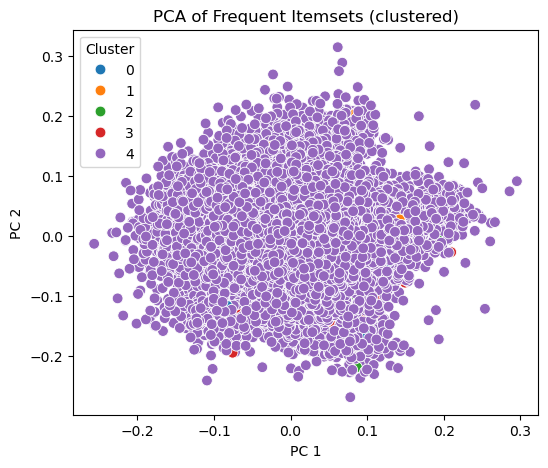

In [12]:
# Plot the itemsets in 2D PCA space, colored by cluster

plt.figure(figsize=(6, 5))
sns.scatterplot(x=coords[:, 0], y=coords[:, 1], hue=labels, palette="tab10", s=60)
plt.title("PCA of Frequent Itemsets (clustered)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()


### Comparison

In [13]:
# ---------- Comparison of Standard Apriori and Clustering-Based Itemsets ----------

# For Standard Apriori: add a new column 'itemsets' in rules by combining antecedents and consequents.
rules["itemsets"] = rules.apply(
    lambda row: row["antecedents"].union(row["consequents"]), axis=1
)

# Convert Standard Apriori itemsets to frozensets for set comparison.
std_sets = set(frozenset(x) for x in rules["itemsets"])

# For Clustering-Based: use multi_itemsets DataFrame (which already has 'itemsets' column).
clustered_sets = set(frozenset(x) for x in multi_itemsets["itemsets"])

# Compute intersections and differences.
common = std_sets.intersection(clustered_sets)
unique_std = std_sets - clustered_sets
unique_cluster = clustered_sets - std_sets

print("✅ Common itemsets:", len(common))
print("📘 Unique to Standard Apriori:", len(unique_std))
print("📗 Unique to Clustering-Based:", len(unique_cluster))

# Create a summary DataFrame for easier viewing:
import pandas as pd

comparison_summary = pd.DataFrame(
    {
        "Category": [
            "Common Itemsets",
            "Unique to Standard Apriori",
            "Unique to Clustering-Based",
        ],
        "Count": [len(common), len(unique_std), len(unique_cluster)],
    }
)
print("\nComparison Summary:")
display(comparison_summary)


✅ Common itemsets: 195693
📘 Unique to Standard Apriori: 0
📗 Unique to Clustering-Based: 91801

Comparison Summary:


,Category,Count
0,Common Itemsets,195693
1,Unique to Standard Apriori,0
2,Unique to Clustering-Based,91801


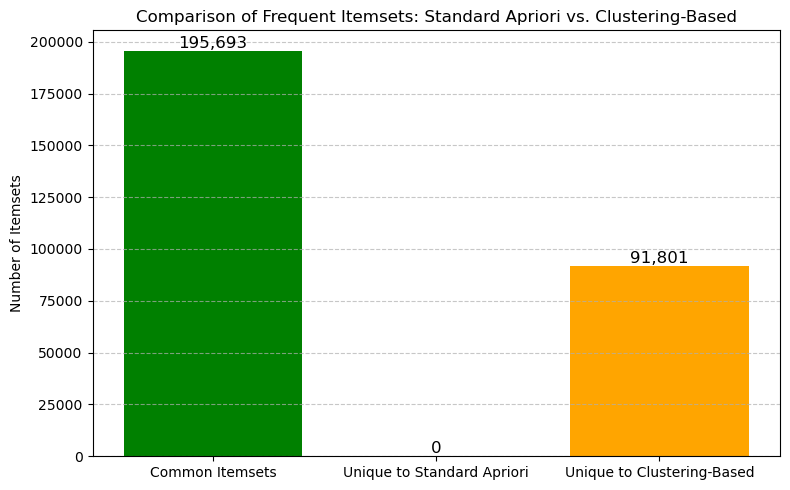

In [14]:
# ---------- Visualization of Comparison ----------

# Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(
    comparison_summary["Category"],
    comparison_summary["Count"],
    color=["green", "blue", "orange"],
)
plt.title("Comparison of Frequent Itemsets: Standard Apriori vs. Clustering-Based")
plt.ylabel("Number of Itemsets")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 10,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=12,
    )
plt.tight_layout()
plt.show()

# Optional: Venn Diagram (requires matplotlib-venn)
# Uncomment the following lines if you have installed matplotlib-venn (pip install matplotlib-venn)
# from matplotlib_venn import venn2
# plt.figure(figsize=(6,6))
# venn2(subsets=(len(unique_std), len(unique_cluster), len(common)),
#       set_labels=('Standard Apriori', 'Clustering-Based'))
# plt.title("Venn Diagram of Frequent Itemsets")
# plt.show()
